# Assignment 9 Coding: Recommendation System Basics 

In this assignment, we will use [Surprise: A Python scikit for recommender systems](http://surpriselib.com/) to predict users' ratings on items based on existing ratings, which is an essential part in modern recommendation systems. Use the following code to install surprise or refer to the website:
```python 
    pip install cython numpy
    pip install scikit-surprise
```

or 

```python 
    pip3 install cython numpy
    pip3 install scikit-surprise
```

or

```python 
    conda install -c conda-forge scikit-surprise
```

## Movielens 100k Dataset
The following code loads the [Movielens Dataset (see the link for more details)](https://grouplens.org/datasets/movielens/), which has 100k ratings of 1682 movies by 943 users. Here we print the ratings given by user 1, which consists of a few tuples in the format (movie_id, rating).

In [5]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import split
import matplotlib.pyplot as plt
import numpy as np
data = Dataset.load_builtin('ml-100k')
dataset = data.build_full_trainset()
ratings = dataset.ur
print("Number of Users:", len(ratings.keys()))
print("Number of Items:", len(dataset.ir.keys()))
print("Ratings from User 1:", ratings[0])

Number of Users: 943
Number of Items: 1682
Ratings from User 1: [(0, 3.0), (528, 4.0), (377, 4.0), (522, 3.0), (431, 5.0), (834, 5.0), (380, 4.0), (329, 4.0), (550, 5.0), (83, 4.0), (632, 2.0), (86, 4.0), (289, 5.0), (363, 3.0), (438, 5.0), (389, 5.0), (649, 4.0), (947, 4.0), (423, 3.0), (291, 3.0), (10, 2.0), (1006, 4.0), (179, 3.0), (751, 3.0), (487, 3.0), (665, 3.0), (92, 4.0), (512, 5.0), (1045, 3.0), (672, 4.0), (656, 4.0), (221, 5.0), (432, 2.0), (365, 3.0), (321, 2.0), (466, 4.0), (302, 4.0), (491, 3.0), (521, 1.0)]


## 1. Prediction using Nearest Neighbour-based Collaborative Filtering

Refer to the section *Train-test split and the fit() method* in [this page](https://surprise.readthedocs.io/en/stable/getting_started.html). Using test_size in $[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]$ and using KNNBasic as the algorithm, plot the rmse of the predictions you get and explain.

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9711
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9716
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9808
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9984
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0027
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0142
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0345
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0616
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1653


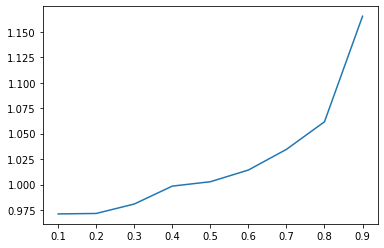

In [8]:
from surprise import KNNBasic
from surprise.model_selection import train_test_split
test_size_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
rmse_list = np.zeros(len(test_size_list))
algo = KNNBasic()
#========= Your code goes here ======
for i in range(len(test_size_list)):
    trainset, testset = train_test_split(data, test_size=test_size_list[i])
    # Train the algorithm on the trainset, and predict ratings for the testset
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Then compute RMSE
    rmse_list[i] = accuracy.rmse(predictions)
#==================================
plt.plot(test_size_list, rmse_list)

### Explanation for Problem 1 ###

As seen in the plot for the RMSE as a function of test set size, as we increase the test size and decrease the training size, the RMSE increases from around 0.975 to more than 1.150. This is the expected behavior because as we reduce the training set size, the model learns from a lower number of samples and thus, cannot perform well on a larger test size it has never seen before. The model can overfit (memorize) the small train set and cannot generalize. The increase in RMSE is rather slow until we reach a test size ratio of 0.8. Beyond this point, the RMSE increases at a high rate. 

## 2. Prediction using SVD-based Collaborative Filtering

Refer to the section *Train-test split and the fit() method* in [this page](https://surprise.readthedocs.io/en/stable/getting_started.html). Using test_size in $[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]$ and using SVD as the algorithm, plot the rmse of the predictions you get and explain.

RMSE: 0.9337
RMSE: 0.9392
RMSE: 0.9480
RMSE: 0.9492
RMSE: 0.9549
RMSE: 0.9623
RMSE: 0.9719
RMSE: 0.9842
RMSE: 1.0064


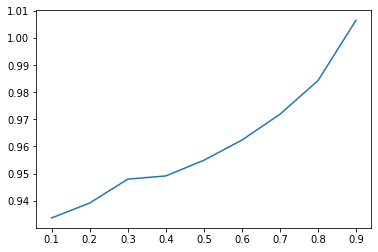

In [7]:
from surprise import SVD
test_size_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
rmse_list = np.zeros(len(test_size_list))
algo = SVD()
#========= Your code goes here ======
for i in range(len(test_size_list)):
    trainset, testset = train_test_split(data, test_size=test_size_list[i])
    # Train the algorithm on the trainset, and predict ratings for the testset
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Then compute RMSE
    rmse_list[i] = accuracy.rmse(predictions)
#==================================
plt.plot(test_size_list, rmse_list)

### Explanation for Problem 2 ###

As seen in the plot for the RMSE as a function of test set size for SVD, as we increase the test size and decrease the training size, the RMSE increases rather consistently from around 0.935 to more than 1.05. Compared to KNNBasic(), the SVD-based collaborative filtering system has lower RMSE, indicating slightly better performance. The increase in RMSE is expected because, as we decrease the training set size, the model learns from a smaller number of samples and cannot perform well on a larger test size it has never seen before. The model can overfit (memorize) the small train set and cannot generalize. The increase in RMSE is somewhat consistent, with a very slight increase in the rate of change beyond test size ratio of 0.8, in contrast to the stark rise in the rate of change for KNNBasic().